In [1]:
#importing libraries
import numpy as np
import ast
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset
dataset = load_dataset('lukebarousse/data_jobs')
df=dataset['train'].to_pandas()
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills']=df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)
df.head()

/opt/anaconda3/envs/p_da_project/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"[r, python, sql, nosql, power bi, tableau]","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"[python, sql, c#, azure, airflow, dax, docker,...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"[python, c++, java, matlab, aws, tensorflow, k...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,None,NaN,NaN,Kristina Daniel,"[bash, python, oracle, aws, ansible, puppet, j...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."


In [4]:
df_DA=df[df['job_title']=='Data Analyst'].copy()   #filtering data analyst jobs

In [16]:

df_DA['job_posted_month_no'] = df_DA['job_posted_date'].dt.month  
df_DA

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month,job_posted_month_no
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"[r, python, sql, nosql, power bi, tableau]","{'analyst_tools': ['power bi', 'tableau'], 'pr...",Jan,1
18,Data Analyst,Data Analyst,"Warsaw, Poland",via Praca Trabajo.org,Full-time,False,Poland,2023-10-16 13:36:54,False,False,Poland,None,NaN,NaN,Glovo,"[sql, python, r, redshift, pandas, excel, look...","{'analyst_tools': ['excel', 'looker', 'tableau...",Oct,10
36,Data Analyst,Data Analyst,"Des Moines, IA",via Trabajo.org,Full-time,False,"Illinois, United States",2023-11-06 13:01:22,False,True,United States,None,NaN,NaN,Assuredpartners,None,None,Nov,11
101,Data Analyst,Data Analyst,Singapore,via BeBee Singapore,Full-time,False,Singapore,2023-12-20 13:15:45,True,False,Singapore,None,NaN,NaN,Moovaz,[sql],{'programming': ['sql']},Dec,12
155,Data Analyst,Data Analyst,"Tampa, FL",via LinkedIn,Full-time,False,"Florida, United States",2023-01-19 13:19:45,False,False,United States,None,NaN,NaN,Citi,"[sql, python, unix, excel, jira]","{'analyst_tools': ['excel'], 'async': ['jira']...",Jan,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785617,Data Analyst,Data Analyst,"Lisbon, Portugal",via Empregos Trabajo.org,Full-time,False,Portugal,2023-06-28 06:51:12,True,False,Portugal,None,NaN,NaN,Onrising,"[sql, excel, power bi]","{'analyst_tools': ['excel', 'power bi'], 'prog...",Jun,6
785628,Data Analyst,Data Analyst,"Gurugram, Haryana, India",via LinkedIn,Full-time,False,India,2023-01-09 06:08:12,False,False,India,None,NaN,NaN,GUS Global Services India Pvt. Ltd.,"[r, python, sql, sap, power bi, tableau, excel]","{'analyst_tools': ['sap', 'power bi', 'tableau...",Jan,1
785638,Data Analyst,Data Analyst,"Buenos Aires, Argentina","via Trabajo.org - Vacantes De Empleo, Trabajo",Full-time,False,Argentina,2023-10-27 06:47:13,False,False,Argentina,None,NaN,NaN,Emprego,"[python, r, sql, looker, tableau]","{'analyst_tools': ['looker', 'tableau'], 'prog...",Oct,10
785644,Data Analyst,Data Analyst,"Las Condes, Chile","via Trabajo.org - Vacantes De Empleo, Trabajo",Full-time,False,Chile,2023-08-20 06:29:50,True,False,Chile,None,NaN,NaN,Worldgroup Careers MWT,"[sql, python, r, snowflake, power bi]","{'analyst_tools': ['power bi'], 'cloud': ['sno...",Aug,8


In [6]:
df_DA_pivot=df_DA.explode('job_skills').groupby('job_skills').size()

In [19]:
df_DA_month=df_DA.explode('job_skills').pivot_table(index='job_posted_month_no',columns='job_skills',aggfunc='size',fill_value=0)

In [20]:
df_DA_month

job_skills,airflow,airtable,alteryx,angular,ansible,apl,arch,asana,asp.net,assembly,...,watson,webex,windows,wire,word,workfront,wrike,wsl,yarn,zoom
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,51,1,128,7,1,1,0,2,3,9,...,3,6,35,0,290,0,1,0,1,11
2,53,0,90,5,3,0,2,6,3,7,...,3,3,43,1,212,0,2,1,2,8
3,43,0,78,6,6,0,0,6,2,7,...,5,4,29,3,222,0,0,0,1,11
4,35,1,93,3,1,1,1,1,0,4,...,2,1,44,4,235,1,0,0,0,3
5,37,1,67,2,4,0,0,1,2,4,...,0,2,32,0,167,0,0,0,2,2
6,42,5,69,3,1,0,2,3,1,9,...,2,1,26,2,225,0,0,0,1,4
7,48,0,68,2,1,0,1,4,0,4,...,0,1,31,2,194,0,0,0,1,3
8,57,2,73,3,0,0,0,2,2,17,...,3,1,33,2,211,0,0,0,2,5
9,25,1,58,3,1,1,0,4,4,1,...,2,0,23,3,132,0,0,0,0,5


In [21]:
df_DA_month.loc['total']=df_DA_month.sum()

In [22]:
df_DA_month

job_skills,airflow,airtable,alteryx,angular,ansible,apl,arch,asana,asp.net,assembly,...,watson,webex,windows,wire,word,workfront,wrike,wsl,yarn,zoom
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,51,1,128,7,1,1,0,2,3,9,...,3,6,35,0,290,0,1,0,1,11
2,53,0,90,5,3,0,2,6,3,7,...,3,3,43,1,212,0,2,1,2,8
3,43,0,78,6,6,0,0,6,2,7,...,5,4,29,3,222,0,0,0,1,11
4,35,1,93,3,1,1,1,1,0,4,...,2,1,44,4,235,1,0,0,0,3
5,37,1,67,2,4,0,0,1,2,4,...,0,2,32,0,167,0,0,0,2,2
6,42,5,69,3,1,0,2,3,1,9,...,2,1,26,2,225,0,0,0,1,4
7,48,0,68,2,1,0,1,4,0,4,...,0,1,31,2,194,0,0,0,1,3
8,57,2,73,3,0,0,0,2,2,17,...,3,1,33,2,211,0,0,0,2,5
9,25,1,58,3,1,1,0,4,4,1,...,2,0,23,3,132,0,0,0,0,5


In [24]:
df_final=df_DA_month.sort_values('total',axis=1,ascending=False).iloc[:-1,:5]

In [28]:
df_final.reset_index(inplace=True)

In [31]:
df_final['month_name']=df_final['job_posted_month_no'].apply(lambda x: calendar.month_abbr[x])

In [30]:
import calendar

In [32]:
df_final

job_skills,job_posted_month_no,sql,excel,python,tableau,power bi,month_name
0,1,2916,1820,1641,1474,1114,Jan
1,2,1972,1233,1140,965,805,Feb
2,3,1952,1243,1115,1022,808,Mar
3,4,1934,1222,1129,960,753,Apr
4,5,1844,1135,1057,886,720,May
5,6,2000,1238,1185,994,869,Jun
6,7,1891,1207,1142,944,773,Jul
7,8,2306,1537,1398,1209,1032,Aug
8,9,1767,1138,1041,883,808,Sep
9,10,1917,1185,1135,986,851,Oct


In [33]:
df_final.drop('job_posted_month_no',axis=1,inplace=True)

<Axes: title={'center': 'Top 5 Skills for Data Analyst Jobs'}, xlabel='month_name'>

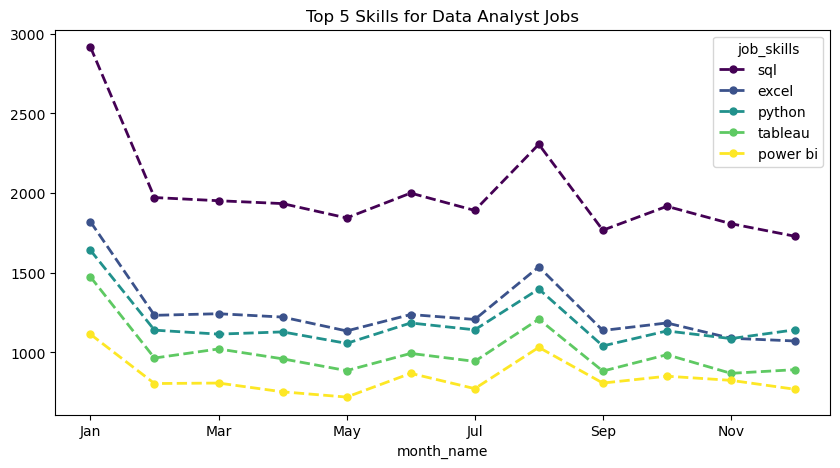

In [38]:
df_final.plot(x='month_name',kind='line'
              ,linewidth=2
              ,linestyle='--'
              ,marker='o'
              ,markersize=5
                ,figsize=(10,5)
              ,colormap='viridis'
              ,title='Top 5 Skills for Data Analyst Jobs'
              
              )